In [33]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


(train_input, train_target), (test_input, test_target) = cifar10.load_data()

print(train_input.shape) # (50000, 32, 32, 3)

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2)


(50000, 32, 32, 3)


In [34]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cifal-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=100,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 36s 28ms/step - loss: 1.3554 - accuracy: 0.5120 - val_loss: 1.1206 - val_accuracy: 0.6038
Epoch 2/100
1250/1250 [==============================] - 38s 31ms/step - loss: 0.9282 - accuracy: 0.6734 - val_loss: 0.9545 - val_accuracy: 0.6655
Epoch 3/100
1250/1250 [==============================] - 37s 29ms/step - loss: 0.7687 - accuracy: 0.7313 - val_loss: 0.8043 - val_accuracy: 0.7252
Epoch 4/100
1250/1250 [==============================] - 35s 28ms/step - loss: 0.6460 - accuracy: 0.7731 - val_loss: 0.8089 - val_accuracy: 0.7206
Epoch 5/100
1250/1250 [==============================] - 38s 30ms/step - loss: 0.5434 - accuracy: 0.8087 - val_loss: 0.8301 - val_accuracy: 0.7249
Epoch 6/100
1250/1250 [==============================] - 38s 30ms/step - loss: 0.4567 - accuracy: 0.8396 - val_loss: 0.8475 - val_accuracy: 0.7368
Epoch 7/100
1250/1250 [==============================] - 38s 31ms/step - loss: 0.3764 - accuracy: 0.8679 - val_loss: 0

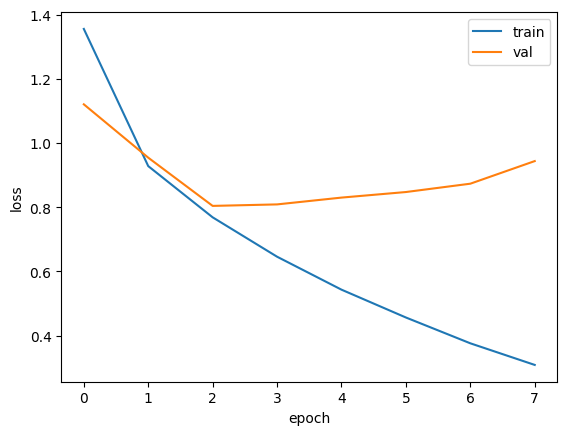

In [36]:
print(history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
model.evaluate(val_scaled, val_target) # loss: 0.7470 - accuracy: 0.7436

model.evaluate(test_input, test_target) # loss: 117.1330 - accuracy: 0.6178

313/313 [==============================] - 4s 11ms/step - loss: 143.1348 - accuracy: 0.6260


[143.13479614257812, 0.6259999871253967]